In [3]:
import pandas as pd
import numpy as np
import sys
import os
import warnings

from sklearn import datasets

In [15]:
data = datasets.load_iris()

X = pd.DataFrame(data.data, columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])
y = pd.DataFrame(data.target, columns=["Species"])

In [16]:
data = pd.concat([X, y], axis=1)

In [18]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


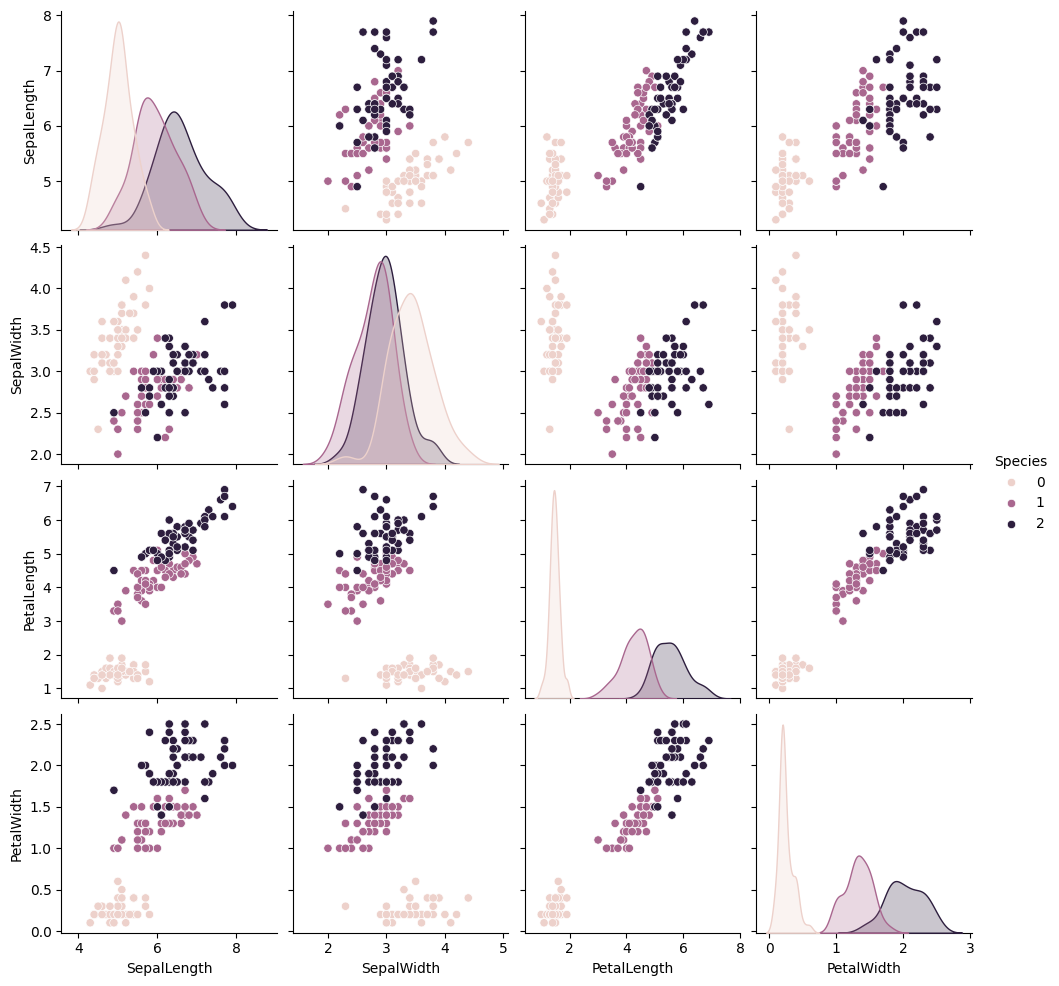

In [19]:
import seaborn as sns

sns.pairplot(data, hue="Species")

### We are ignoring the class which is linearly separable from other two classes, as we can see in above plot

In [23]:
# ignoring linearly seperable class from data
optimized_data = data[data["Species"]!=0][["SepalLength", "SepalWidth", "Species"]]

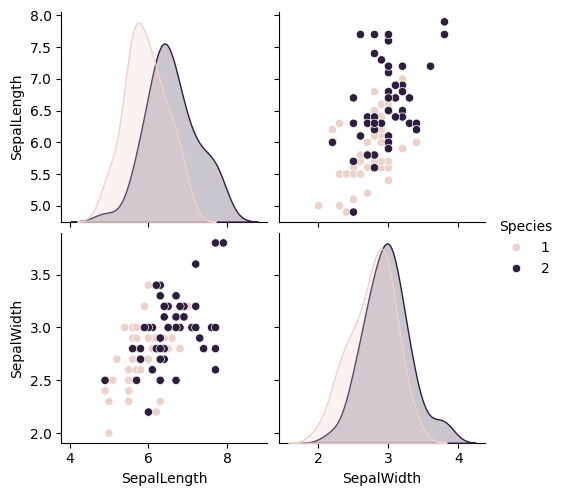

In [24]:
sns.pairplot(optimized_data, hue="Species")

In [26]:
optimized_data.shape

(100, 3)

In [37]:
# splitting data
X = optimized_data.iloc[:, 0:2]
y = optimized_data.iloc[:,-1]

In [38]:
X.head()

,SepalLength,SepalWidth
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8


In [39]:
y.head()

50    1
51    1
52    1
53    1
54    1
Name: Species, dtype: int32

In [43]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()

In [62]:
estimators = [('LGR', clf1), ('DTC', clf2), ('KNN', clf3)]

In [63]:
estimators[0]

('LGR', LogisticRegression())

In [64]:
estimators[1]

('DTC', DecisionTreeClassifier())

In [65]:
estimators[2]

('KNN', KNeighborsClassifier())

In [68]:
for estimator in estimators:
    op = cross_val_score(estimator[1],X,y, cv=10, scoring="accuracy")
    print(f"{estimator[0]} : acc -> {np.round(np.mean(op), 2)} - std -> {np.round(np.std(op), 2)}")

LGR : acc -> 0.75 - std -> 0.14
DTC : acc -> 0.55 - std -> 0.15
KNN : acc -> 0.62 - std -> 0.1


### Hard Voting Classifier 
this will use ouput as 1, 2, 3 and return prediction based on mode

In [75]:
from sklearn.ensemble import VotingClassifier

In [76]:
estimators

[('LGR', LogisticRegression()),
 ('DTC', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [77]:
vclf = VotingClassifier(estimators=estimators, voting="hard")

In [78]:
op = cross_val_score(vclf,X,y, cv=10, scoring="accuracy")
print(f"Voting Clf : acc -> {np.round(np.mean(op), 2)} - std -> {np.round(np.std(op), 2)}")

Voting Clf : acc -> 0.66 - std -> 0.11


### Soft Voting Classifier

this will use prebability scores and will multipy it and return the prediction

In [79]:
vclf = VotingClassifier(estimators=estimators, voting="soft")

In [80]:
op = cross_val_score(vclf,X,y, cv=10, scoring="accuracy")
print(f"Voting Clf : acc -> {np.round(np.mean(op), 2)} - std -> {np.round(np.std(op), 2)}")

Voting Clf : acc -> 0.59 - std -> 0.18
